# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


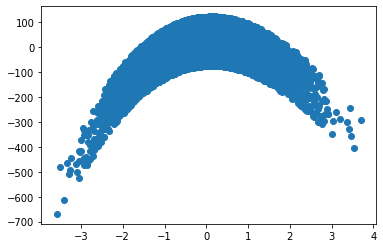

In [104]:
from sklearn.datasets import make_regression

# the equation 2 * x^3 - 40 * x^2 + 9 * x + 24
n = 10000
X = np.random.randn(n)
randomize = np.random.randint(-100,100, size = n)
y = []
for i in range(n):
    y.append((2*X[i]**3)-(40*X[i]**2)+(9*X[i])+24)

for i in range(n):
    y[i] = y[i] + randomize[i]
    
datadict = {'data': X, 'target': y}
data = pd.DataFrame(data=datadict)
plt.scatter(X,y)
plt.show()


In [105]:
X = data.iloc[:,[0]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [111]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(D,))
dense_layer_1 = Dense(20, activation='relu')(input_layer)
dense_layer_2 = Dense(20, activation='relu')(input_layer)
output = Dense(1)(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 6891.2241 - mse: 6891.2241 - val_loss: 7508.6895 - val_mse: 7508.6895
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 6725.5806 - mse: 6725.5806 - val_loss: 7258.7969 - val_mse: 7258.7969
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 6492.4126 - mse: 6492.4126 - val_loss: 6953.0410 - val_mse: 6953.0410
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 6228.4580 - mse: 6228.4580 - val_loss: 6622.1758 - val_mse: 6622.1758
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 5962.8447 - mse: 5962.8447 - val_loss: 6313.7588 - val_mse: 6313.7588
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 5724.8008 - mse: 5724.8008 - val_loss: 6036.6836 - val_mse: 6036.6836
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 5511.6875 - mse: 5511.6875 - val_loss: 5789.6143 - val_

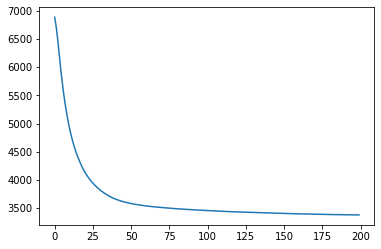

In [113]:
plt.plot(report.history['loss'], label="loss = SGD")

In [114]:
print(X.shape)
print(y.shape)

(10000, 1)
(10000,)


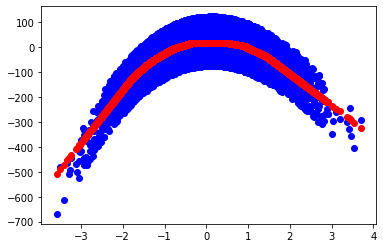

In [115]:
y_predicted = model.predict(X)
plt.scatter(X,y, color='b')
plt.scatter(X,y_predicted, color='r')
plt.show()

In [116]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))

250/250 [==============================] - 0s 928us/step - loss: 3375.7932 - mse: 3375.7932
Train eval:  [3375.793212890625, 3375.793212890625]
63/63 [==============================] - 0s 764us/step - loss: 3392.4543 - mse: 3392.4543
Test eval:  [3392.454345703125, 3392.454345703125]
